In [195]:
#fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

#data files
scores = "Datasets/superbowl.csv"
ads = "Datasets/superbowl-ads.csv"

#data reads
score_df = pd.read_csv(scores)
ad_df = pd.read_csv(ads)

#displaying data table for preview
ad_df

,index,year,brand,superbowl_ads_dot_com_url,youtube_url,Genre,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex,likes,dislikes,ratio,theme,theme_2,altruistic/consumerist
0,0,2018,Toyota,https://superbowl-ads.com/good-odds-toyota/,https://www.youtube.com/watch?v=zeBZvwYQ-hA,Automotive,no,no,no,no,no,no,no,1400.0,43.0,0.97,inspirational,NaN,altruistic
1,1,2020,Bud Light,https://superbowl-ads.com/2020-bud-light-seltz...,https://www.youtube.com/watch?v=nbbp0VW7z8w,Beer,yes,yes,no,yes,yes,no,no,1200.0,26.0,0.98,shopping,NaN,consumerist
2,2,2006,Bud Light,https://superbowl-ads.com/2006-bud-light-bear-...,https://www.youtube.com/watch?v=yk0MQD5YgV8,Beer,yes,no,no,no,yes,yes,no,131.0,16.0,0.89,NaN,NaN,consumerist
3,3,2018,Hynudai,https://superbowl-ads.com/hope-detector-nfl-su...,https://www.youtube.com/watch?v=lNPccrGk77A,Automotive,no,yes,no,no,no,no,no,2.0,0.0,1.00,inspirational,NaN,awareness
4,4,2003,Bud Light,https://superbowl-ads.com/2003-bud-light-hermi...,NaN,Beer,yes,yes,no,no,yes,yes,yes,20.0,0.0,1.00,NaN,NaN,consumerist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,2014,NFL,https://superbowl-ads.com/nfl-now/,NaN,Football,no,yes,no,no,no,no,no,NaN,NaN,NaN,NaN,NaN,consumerist
240,240,2012,Budweiser,https://superbowl-ads.com/2012-budweiser-etern...,https://www.youtube.com/watch?v=_GeiOdHsW_8,Beer,no,yes,yes,no,no,yes,yes,598.0,101.0,0.86,NaN,NaN,consumerist
241,241,2001,Pepsi,https://superbowl-ads.com/2001-pepsi-kasparov-...,https://www.youtube.com/watch?v=pldGc0Cpf84,Soft Drink,yes,no,no,yes,yes,no,no,21.0,0.0,1.00,NaN,NaN,consumerist
242,242,2001,E-Trade,https://superbowl-ads.com/2001-etrade-security...,https://www.youtube.com/watch?v=39BL7iqe6pQ,Trading,yes,no,no,no,yes,no,no,14.0,5.0,0.74,NaN,NaN,consumerist


In [196]:
#grabbing all unique genres
genres = ad_df.Genre.unique()
print(genres)

#also removing non_data columns from df for readability
ad_df.drop('superbowl_ads_dot_com_url', inplace=True, axis=1)
ad_df.drop('youtube_url', inplace=True, axis=1)
ad_df.drop('index', inplace=True, axis=1)
ad_df.drop('show_product_quickly', inplace=True, axis=1)

['Automotive' 'Beer' 'Soft Drink' 'Football' 'Chips' 'Trading']


In [197]:
#sorting
ad_df = ad_df.sort_values(by=['year'])

In [198]:
#getting list of altruistic ads and consumerist ads
alt_ads = ad_df.loc[ad_df['altruistic/consumerist'] == 'altruistic']
con_ads = ad_df.loc[ad_df['altruistic/consumerist'] == 'consumerist']
alt_ads

,year,brand,Genre,funny,patriotic,celebrity,danger,animals,use_sex,likes,dislikes,ratio,theme,theme_2,altruistic/consumerist
243,2001,Budweiser,Beer,no,no,yes,no,no,no,360.0,5.0,0.99,NaN,NaN,altruistic
102,2014,Budweiser,Beer,no,yes,no,no,yes,no,NaN,NaN,NaN,together,NaN,altruistic
78,2016,Budweiser,Beer,no,no,yes,no,no,no,NaN,NaN,NaN,informative,NaN,altruistic
88,2017,Hynudai,Automotive,no,yes,no,no,no,no,NaN,NaN,NaN,together,NaN,altruistic
54,2017,Kia,Automotive,yes,no,yes,yes,yes,no,NaN,NaN,NaN,inspirational,NaN,altruistic
0,2018,Toyota,Automotive,no,no,no,no,no,no,1400.0,43.0,0.97,inspirational,NaN,altruistic
107,2018,Budweiser,Beer,no,yes,no,no,no,no,176.0,10.0,0.95,together,informative,altruistic
96,2019,Budweiser,Beer,no,no,no,no,yes,no,NaN,NaN,NaN,together,NaN,altruistic


In [199]:
#gathering ad counts to prepare bar graph
total_ads = ad_df.count()['year']
print(f'The total count of ads are {total_ads}')
total_alt_ads = alt_ads.count()['year']
print(f'The total count of altruistics ads are {total_alt_ads}')
total_con_ads = con_ads.count()['year']
print(f'The total count of consumeristic ads are {total_con_ads}')

The total count of ads are 244
The total count of altruistics ads are 8
The total count of consumeristic ads are 235


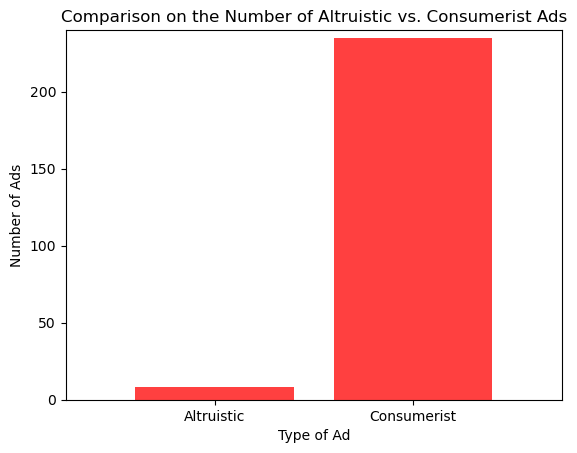

In [200]:
#preparing plot
type_of_ads = ["Altruistic", "Consumerist"]
number_of_ads = [total_alt_ads, total_con_ads]

x_axis = np.arange(0, len(type_of_ads))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Comparison on the Number of Altruistic vs. Consumerist Ads")
plt.xlabel("Type of Ad")
plt.ylabel("Number of Ads")

plt.xlim(-0.75, len(type_of_ads)-.25)
plt.ylim(0, max(number_of_ads) + 5)

plt.bar(x_axis, number_of_ads, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, type_of_ads)
# Save the figure
plt.savefig("outputs/CompAltvCon.png")
plt.show()

In [201]:
#grabbing means
alt_ads_mean = alt_ads["ratio"].mean()
alt_ads_mean = f'{alt_ads_mean * 100}%'
print(f'The average like ratio of altruistic ads is {alt_ads_mean}')
con_ads_mean = con_ads["ratio"].mean()
con_ads_mean = f'{con_ads_mean * 100}%'
print(f'The average like ratio of consumerist ads is {con_ads_mean}')

The average like ratio of altruistic ads is 97.00000000000001%
The average like ratio of consumerist ads is 92.37878787878786%


In [202]:
#grabbing all unique themes
theme1 = ad_df.dropna().theme.unique()
theme2 = ad_df.dropna().theme_2.unique()
themes = np.hstack((theme1, theme2))
uniq_themes = ['Animal','Celebrity','Dangerous','Familial','Funny','Informative',
               'Inspirational','Nostalgic','Patriotic','Sexually Appealing','Togetherness']
print(uniq_themes)

['Animal', 'Celebrity', 'Dangerous', 'Familial', 'Funny', 'Informative', 'Inspirational', 'Nostalgic', 'Patriotic', 'Sexually Appealing', 'Togetherness']


In [203]:
#grabbing the number of ads per theme (family, informative, inspirational, nostalgia, together)

#animal ads
animal_ads = ad_df.loc[ad_df['animals'] == 'yes']
ani_ad_count = animal_ads.count()['year']
print(f'The number of animal ads is {ani_ad_count}.')

#celebrity ads
celebrity_ads = ad_df.loc[ad_df['celebrity'] == 'yes']
cel_ad_count = celebrity_ads.count()['year']
print(f'The number of celebrity ads is {cel_ad_count}.')

#dangerous ads
dangerous_ads = ad_df.loc[ad_df['danger'] == 'yes']
dan_ad_count = dangerous_ads.count()['year']
print(f'The number of dangerous ads is {dan_ad_count}.')

#familial ads
familial_ads_col1 = ad_df.loc[ad_df['theme'] == 'family']
familial_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'family']
familial_ads = pd.concat([familial_ads_col1, familial_ads_col2])
fam_ad_count = familial_ads.count()['year']
print(f'The number of familial ads is {fam_ad_count}.')

#funny ads
funny_ads = ad_df.loc[ad_df['funny'] == 'yes']
fun_ad_count = funny_ads.count()['year']
print(f'The number of funny ads is {fun_ad_count}.')

#informative_ads
informative_ads_col1 = ad_df.loc[ad_df['theme'] == 'informative']
informative_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'informative']
informative_ads = pd.concat([informative_ads_col1, informative_ads_col2])
inf_ad_count = informative_ads.count()['year']
print(f'The number of informative ads is {inf_ad_count}.')

#inspirational ads
inspirational_ads_col1 = ad_df.loc[ad_df['theme'] == 'inspirational']
inspirational_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'inspirational']
inspirational_ads = pd.concat([inspirational_ads_col1, inspirational_ads_col2])
insp_ad_count = inspirational_ads.count()['year']
print(f'The number of inspirational ads is {insp_ad_count}.')

#nostalgic ads
nostalgic_ads_col1 = ad_df.loc[ad_df['theme'] == 'nostalgia']
nostalgic_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'nostalgia']
nostalgic_ads = pd.concat([nostalgic_ads_col1, nostalgic_ads_col2])
nos_ad_count = nostalgic_ads.count()['year']
print(f'The number of nostalgic ads is {nos_ad_count}.')

#patriotic ads
patriotic_ads = ad_df.loc[ad_df['patriotic'] == 'yes']
pat_ad_count = funny_ads.count()['year']
print(f'The number of patriotic ads is {pat_ad_count}.')

#sexually appealing ads
sexual_ads = ad_df.loc[ad_df['use_sex'] == 'yes']
sex_ad_count = sexual_ads.count()['year']
print(f'The number of sexual ads is {sex_ad_count}.')

#together ads
together_ads_col1 = ad_df.loc[ad_df['theme'] == 'together']
together_ads_col2 = ad_df.loc[ad_df['theme_2'] == 'together']
together_ads = pd.concat([together_ads_col1, together_ads_col2])
tog_ad_count = together_ads.count()['year']
print(f'The number of together ads is {tog_ad_count}.')

The number of animal ads is 89.
The number of celebrity ads is 68.
The number of dangerous ads is 75.
The number of familial ads is 18.
The number of funny ads is 171.
The number of informative ads is 25.
The number of inspirational ads is 22.
The number of nostalgic ads is 16.
The number of patriotic ads is 171.
The number of sexual ads is 69.
The number of together ads is 48.


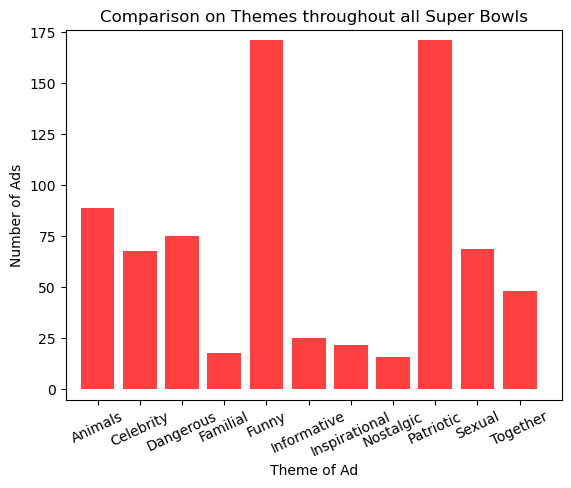

In [211]:
#preparing plot
theme_of_ads = ['Animals','Celebrity','Dangerous','Familial','Funny',
        'Informative','Inspirational','Nostalgic','Patriotic','Sexual','Together']
theme_number_of_ads = [ani_ad_count, cel_ad_count, dan_ad_count, fam_ad_count, fun_ad_count, inf_ad_count, 
                       insp_ad_count,nos_ad_count, pat_ad_count, sex_ad_count, tog_ad_count]

x_axis = np.arange(0, len(theme_of_ads))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Comparison on Themes throughout all Super Bowls")
plt.xlabel("Theme of Ad")
plt.ylabel("Number of Ads")

plt.xlim(-0.75, len(theme_of_ads))
plt.ylim(-5, max(theme_number_of_ads) + 5)

plt.bar(x_axis, theme_number_of_ads, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, theme_of_ads)
plt.xticks(rotation = 25)
plt.savefig("outputs/CompThemes.png")
plt.show()

In [219]:
#grabbing means
ani_ads_mean = animal_ads["ratio"].mean()
ani_ads_mean = f'{ani_ads_mean * 100}%'
print(f'The average like ratio of animal ads is {ani_ads_mean}')
cel_ads_mean = celebrity_ads["ratio"].mean()
cel_ads_mean = f'{cel_ads_mean * 100}%'
print(f'The average like ratio of consumerist ads is {con_ads_mean}')
dan_ads_mean = dangerous_ads["ratio"].mean()
dan_ads_mean = f'{dan_ads_mean * 100}%'
print(f'The average like ratio of dangerous ads is {dan_ads_mean}')
fam_ads_mean = familial_ads["ratio"].mean()
fam_ads_mean = f'{fam_ads_mean * 100}%'
print(f'The average like ratio of familial ads is {fam_ads_mean}')
fun_ads_mean = funny_ads["ratio"].mean()
fun_ads_mean = f'{fun_ads_mean * 100}%'
print(f'The average like ratio of funny ads is {fun_ads_mean}')
inf_ads_mean = informative_ads["ratio"].mean()
inf_ads_mean = f'{inf_ads_mean * 100}%'
print(f'The average like ratio of informative ads is {inf_ads_mean}')
insp_ads_mean = inspirational_ads["ratio"].mean()
insp_ads_mean = f'{insp_ads_mean * 100}%'
print(f'The average like ratio of inspirational ads is {insp_ads_mean}')
nos_ads_mean = nostalgic_ads["ratio"].mean()
nos_ads_mean = f'{nos_ads_mean * 100}%'
print(f'The average like ratio of nostalgic ads is {nos_ads_mean}')
pat_ads_mean = patriotic_ads["ratio"].mean()
pat_ads_mean = f'{pat_ads_mean * 100}%'
print(f'The average like ratio of patriotic ads is {pat_ads_mean}')
sex_ads_mean = sexual_ads["ratio"].mean()
sex_ads_mean = f'{sex_ads_mean * 100}%'
print(f'The average like ratio of sexual ads is {sex_ads_mean}')
tog_ads_mean = together_ads["ratio"].mean()
tog_ads_mean = f'{tog_ads_mean * 100}%'
print(f'The average like ratio of together ads is {tog_ads_mean}')

The average like ratio of animal ads is 93.19178082191782%
The average like ratio of consumerist ads is 92.37878787878786%
The average like ratio of dangerous ads is 93.38805970149254%
The average like ratio of familial ads is 92.66666666666669%
The average like ratio of funny ads is 93.12162162162157%
The average like ratio of informative ads is 94.5%
The average like ratio of inspirational ads is 88.25%
The average like ratio of nostalgic ads is 91.54545454545455%
The average like ratio of patriotic ads is 89.70000000000002%
The average like ratio of sexual ads is 92.31147540983608%
The average like ratio of together ads is 90.19444444444444%


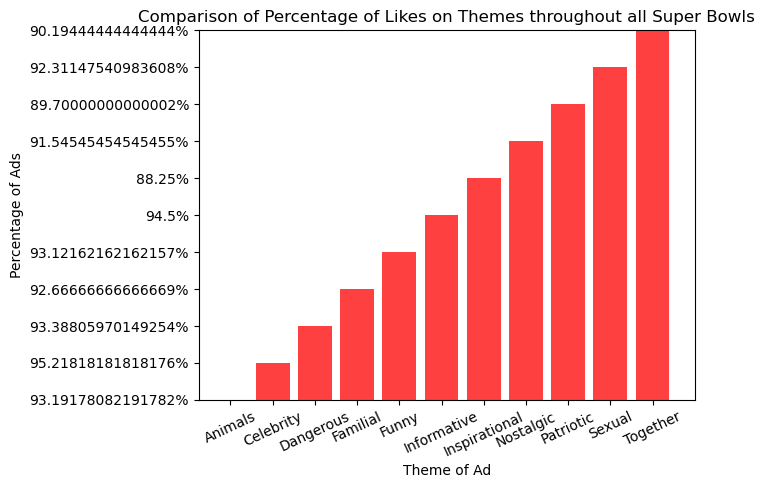

In [250]:
#preparing plot
theme_of_ads = ['Animals','Celebrity','Dangerous','Familial','Funny',
        'Informative','Inspirational','Nostalgic','Patriotic','Sexual','Together']
mean_of_ads = [ani_ads_mean, cel_ads_mean, dan_ads_mean, fam_ads_mean, fun_ads_mean, inf_ads_mean, 
                       insp_ads_mean,nos_ads_mean, pat_ads_mean, sex_ads_mean, tog_ads_mean]

x_axis = np.arange(0, len(theme_of_ads))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Comparison of Percentage of Likes on Themes throughout all Super Bowls")
plt.xlabel("Theme of Ad")
plt.ylabel("Percentage of Ads")

plt.xlim(-0.75, len(theme_of_ads))
plt.ylim(0, 10)

plt.bar(x_axis, theme_number_of_ads, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, theme_of_ads)
plt.xticks(rotation = 25)
plt.savefig("outputs/Comp%ofThemes.png")
plt.show()